In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline 
#%matplotlib widget 

In [2]:
def parse_file(path):
    with open(path+"/graphsum_multinews_sentences.log", "r", encoding="utf-8") as f:
        rouge_cont = f.readlines()
    rouge_cont = [x.strip() for x in rouge_cont] 
    indx=[i for i, s in enumerate(rouge_cont) if 'ROUGE' in s][-2:]
    
    with open(path+"/job.log.0", "r", encoding="utf-8") as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content] 

    indices = [i for i, s in enumerate(content) if 'word_embedding_name' in s]
    indices_2 = [i for i, s in enumerate(content) if 'Num train examples' in s]
    params=content[:indices[0]+1]+ [i[31:] for i in content[indices_2[0]:indices_2[0]+3]]+[rouge_cont[indx[0]][3:],rouge_cont[indx[1]]]
    params= dict([p.split(":") for p in params])
    params['epochs'] = np.ceil(int(params['Max train steps'])/1490).astype(int)
    if path[11:]=="":
        params['name']="Current run"
    else:
        params['name']=path[11:]
    indices = [i for i, s in enumerate(content) if 'loss:' in s]
    loss_per_step =np.array([float(content[i][content[i].find("loss:")+6:content[i].find(", ppl")]) for i in indices])
    ppl_per_step=np.array([float(content[i][content[i].find("ppl:")+5:content[i].find(", acc")]) for i in indices])
    acc_per_step=np.array([float(content[i][content[i].find("acc:")+5:content[i].find(", lea")]) for i in indices])
    lr_per_step=np.array([float(content[i][content[i].find("rate:")+6:content[i].find(", spe")]) for i in indices])
    epochs=np.array([int(content[i][content[i].find("epoch:")+7:content[i].find(", pro")]) for i in indices])
    epochs_indexs=[np.where(epochs==i) for i in np.unique(epochs)]
    acc_mean_per_epoch=[np.mean(acc_per_step[ep]) for ep in epochs_indexs]
    loss_mean_per_epoch=[np.mean(loss_per_step[ep]) for ep in epochs_indexs]
    ppl_mean_per_epoch=[np.mean(ppl_per_step[ep]) for ep in epochs_indexs]
    lr_mean_per_epoch=[np.mean(lr_per_step[ep]) for ep in epochs_indexs]
    values=[i for i in params.values()]
    keys=[i for i in params.keys()]

    return values, keys ,content,epochs_indexs, loss_per_step, ppl_per_step,lr_per_step, acc_mean_per_epoch, loss_mean_per_epoch, ppl_mean_per_epoch, lr_mean_per_epoch 

def plot_curves(logarithmic=True, start_step=0):
    title=['loss_per_step', 'ppl_per_step','lr_per_step', 'acc_mean_per_epoch', 'loss_mean_per_epoch', 'ppl_mean_per_epoch', 'lr_mean_per_epoch']
    for i in range(4,11):
        plt.figure(figsize=(20,10))
        plt.title(title[i-4])
        for r in res:
            plt.plot(r[i][start_step:], label=r[0][-1])
        plt.legend()
        if logarithmic:   
            plt.yscale('log')
            plt.ylabel("Logarithmic value")
        else:
            plt.ylabel("Value")
        if i < 7:
            plt.xlabel("Step")
        else:
            plt.xlabel("Epoch")
        plt.grid()
        plt.show()


In [3]:
paths=['./logs/log/1-Mar-300-epoch-sentence-pruned', './logs/log/18-Feb-10-epoch-sentence-pruned-75-30', './logs/log/22-Feb-100-epoch-sentence-pruned-75-30']

In [4]:
res=[parse_file(path) for path in paths]

In [5]:
df=pd.DataFrame([i[0] for i in res], columns=res[0][1])

In [6]:
pd.set_option('display.max_columns', None)
display(df)

,attention_probs_dropout_prob,dec_graph_layers,dec_word_pos_embedding_name,enc_graph_layers,enc_sen_pos_embedding_name,enc_word_layers,enc_word_pos_embedding_name,hidden_act,hidden_dropout_prob,hidden_size,initializer_range,max_position_embeddings,num_attention_heads,postprocess_command,preprocess_command,word_embedding_name,Num train examples,Max train steps,Num warmup steps,ROUGE-F(1/2/3/l),ROUGE-R(1/2/3/l),epochs,name
0,0.1,8,dec_word_pos_embedding,2,enc_sen_pos_embedding,6,enc_word_pos_embedding,relu,0.1,256,0.02,512,8,da,n,word_embedding,44692,446920,8000,41.72/12.02/38.00,37.59/11.00/34.30,300,1-Mar-300-epoch-sentence-pruned
1,0.1,8,dec_word_pos_embedding,2,enc_sen_pos_embedding,6,enc_word_pos_embedding,relu,0.1,256,0.02,512,8,da,n,word_embedding,44692,14897,8000,42.95/15.32/39.42,38.17/13.63/34.98,10,18-Feb-10-epoch-sentence-pruned-75-30
2,0.1,8,dec_word_pos_embedding,2,enc_sen_pos_embedding,6,enc_word_pos_embedding,relu,0.1,256,0.02,512,8,da,n,word_embedding,44692,148973,8000,38.62/13.17/35.20,35.67/12.20/32.46,100,22-Feb-100-epoch-sentence-pruned-75-30


Metric curves in logarithmic scale

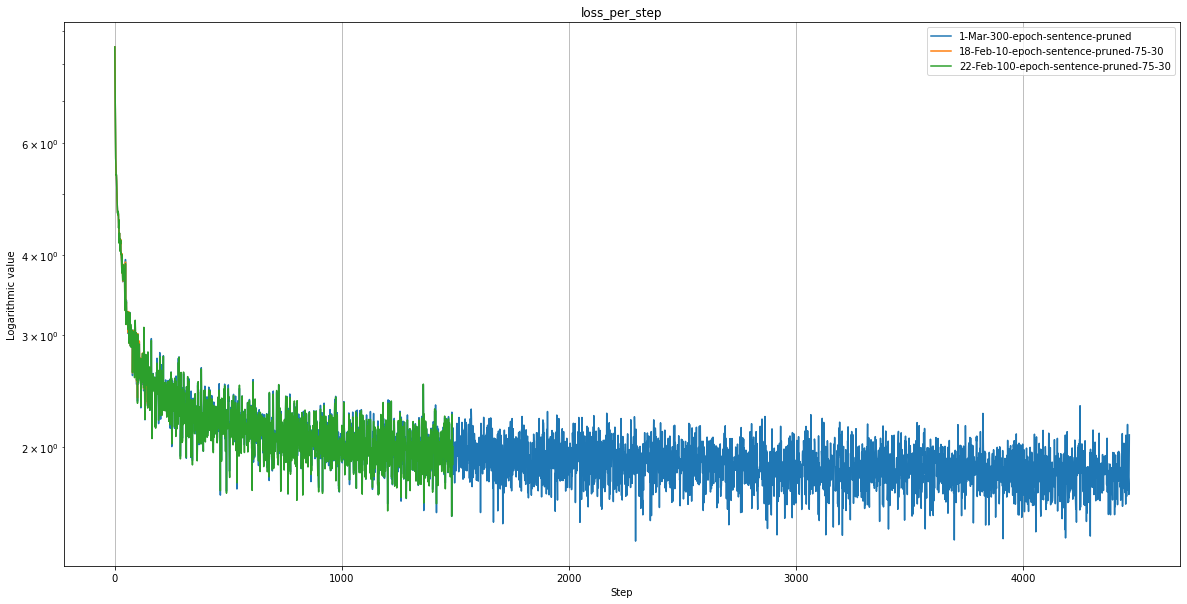

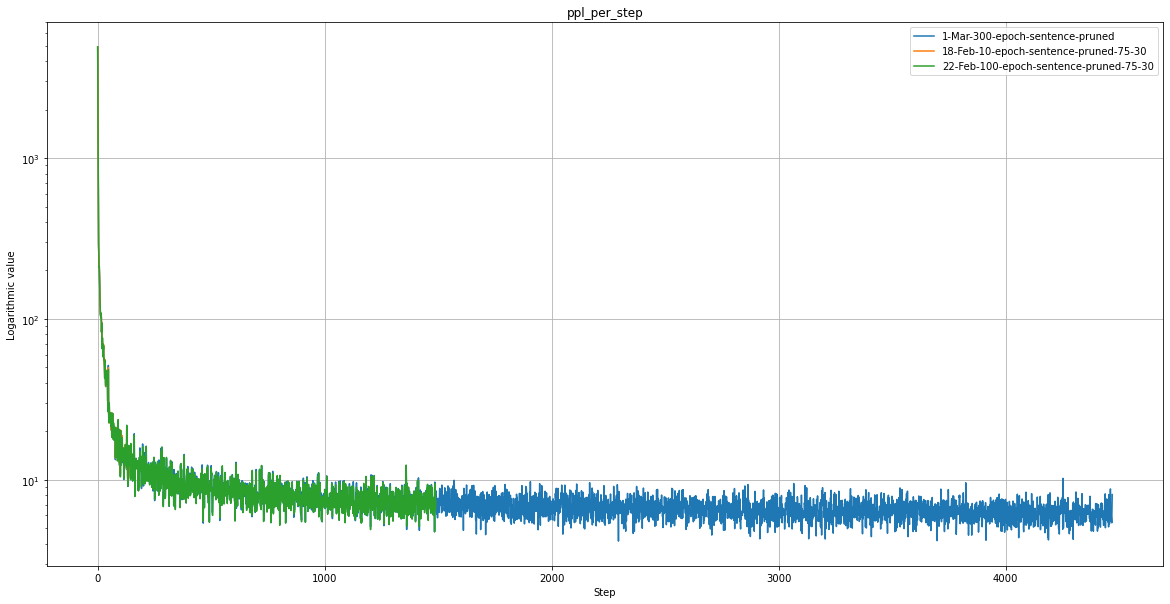

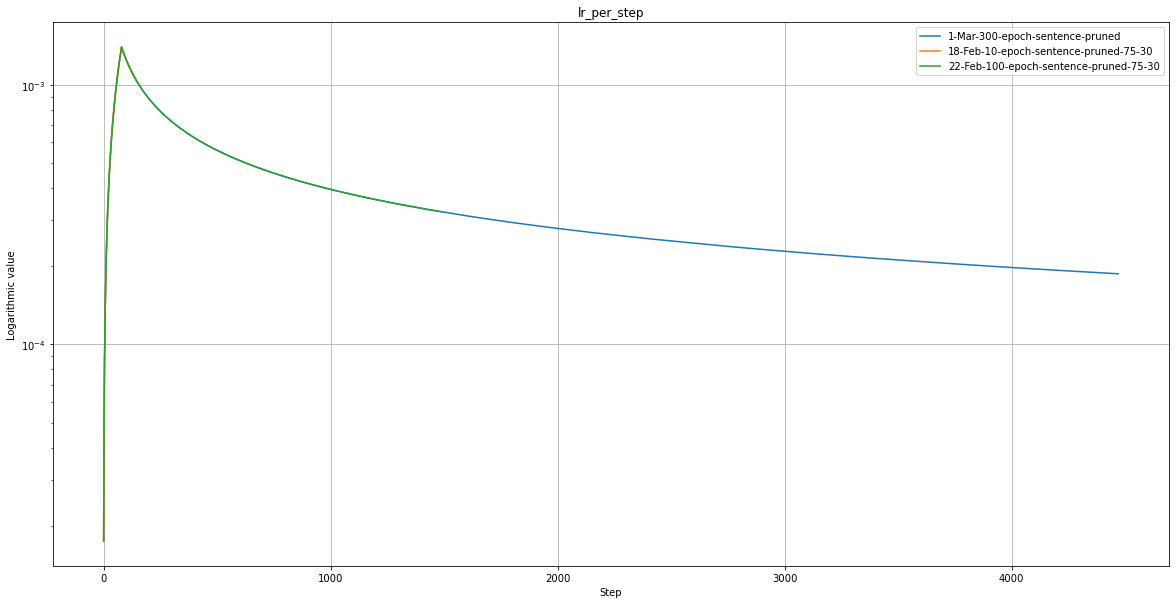

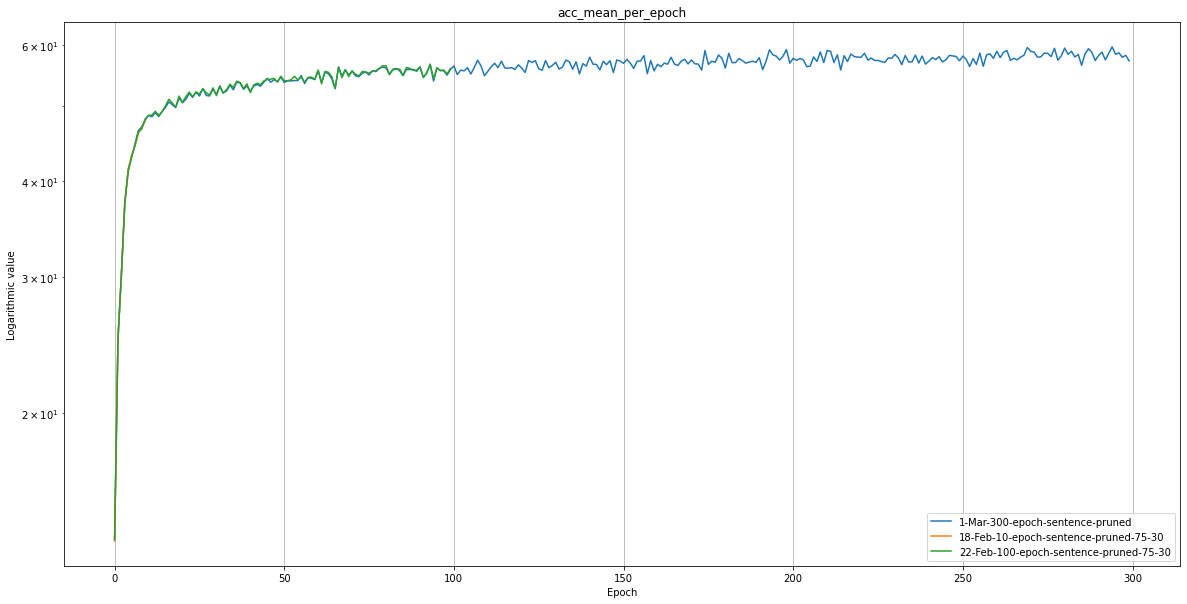

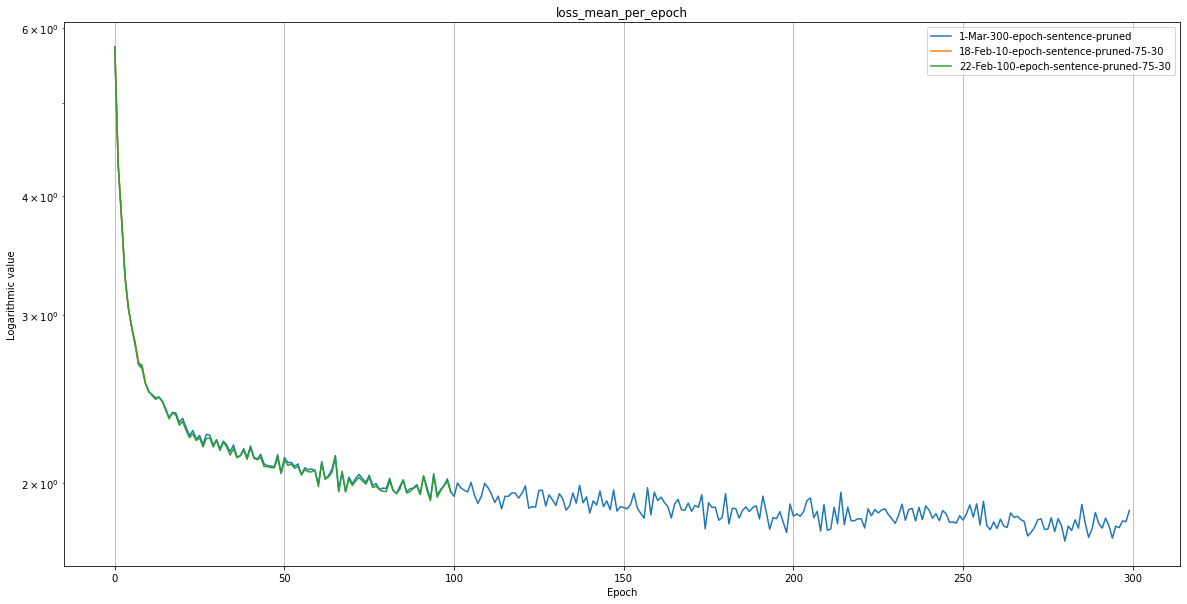

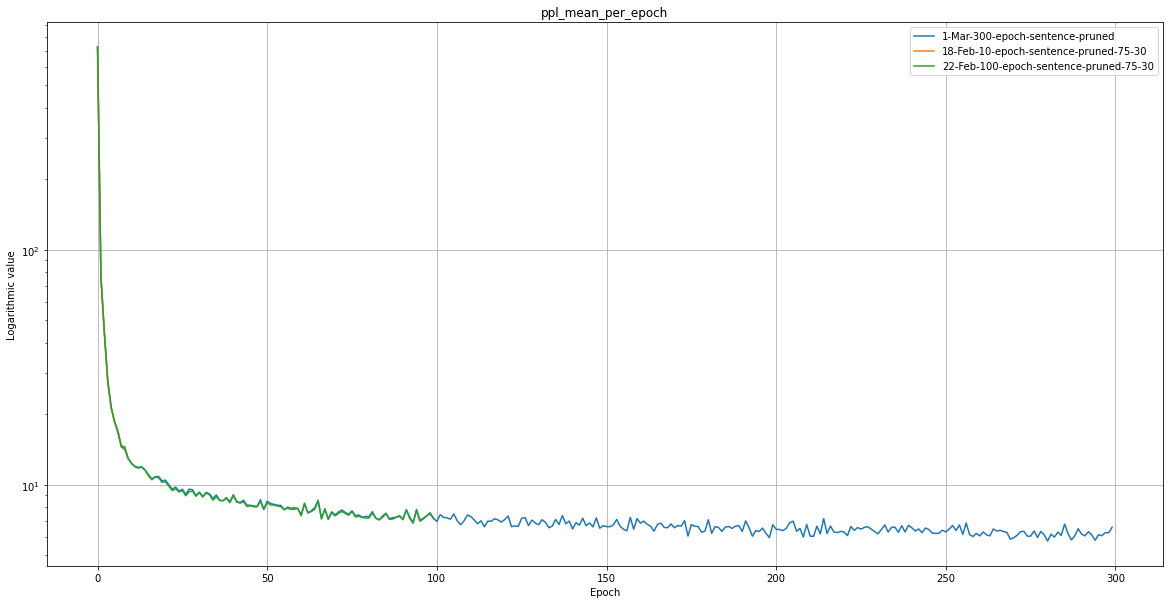

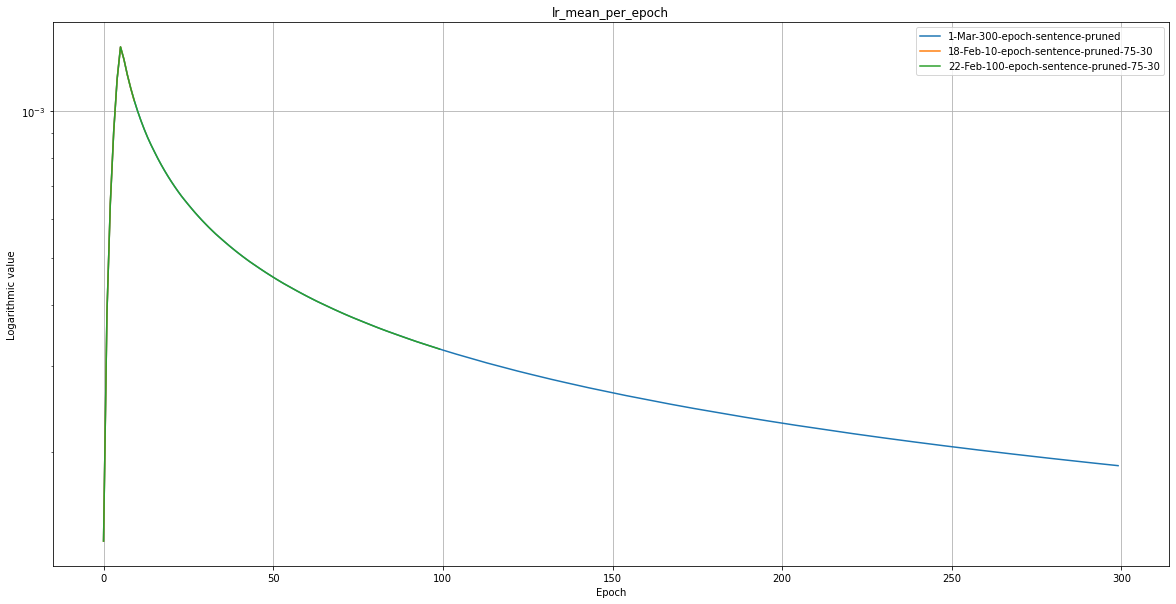

In [7]:
plot_curves(logarithmic=True)

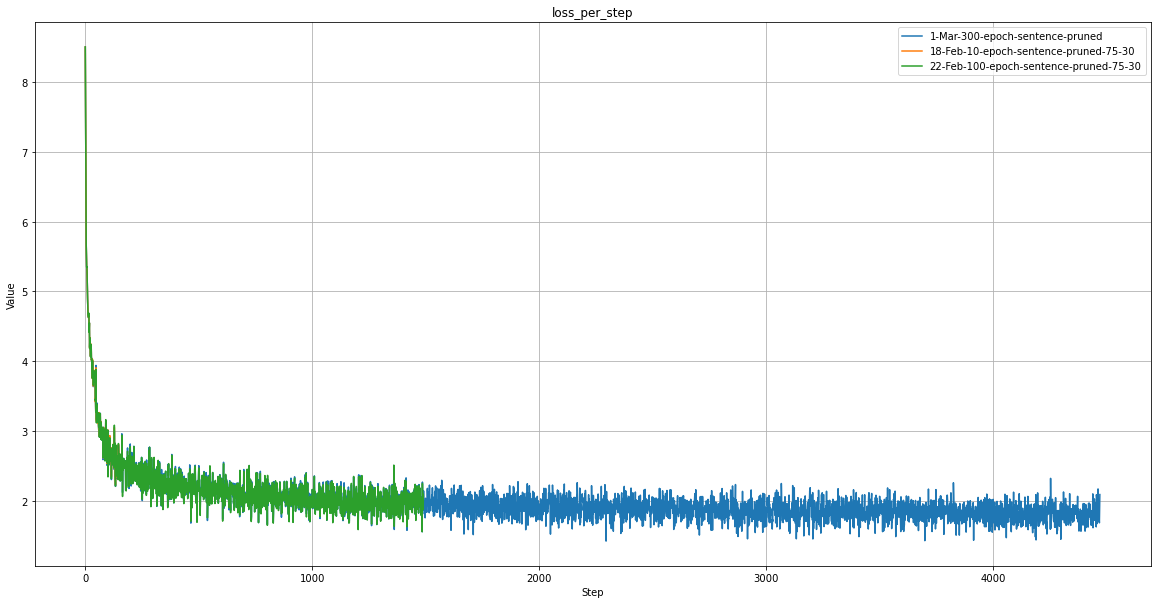

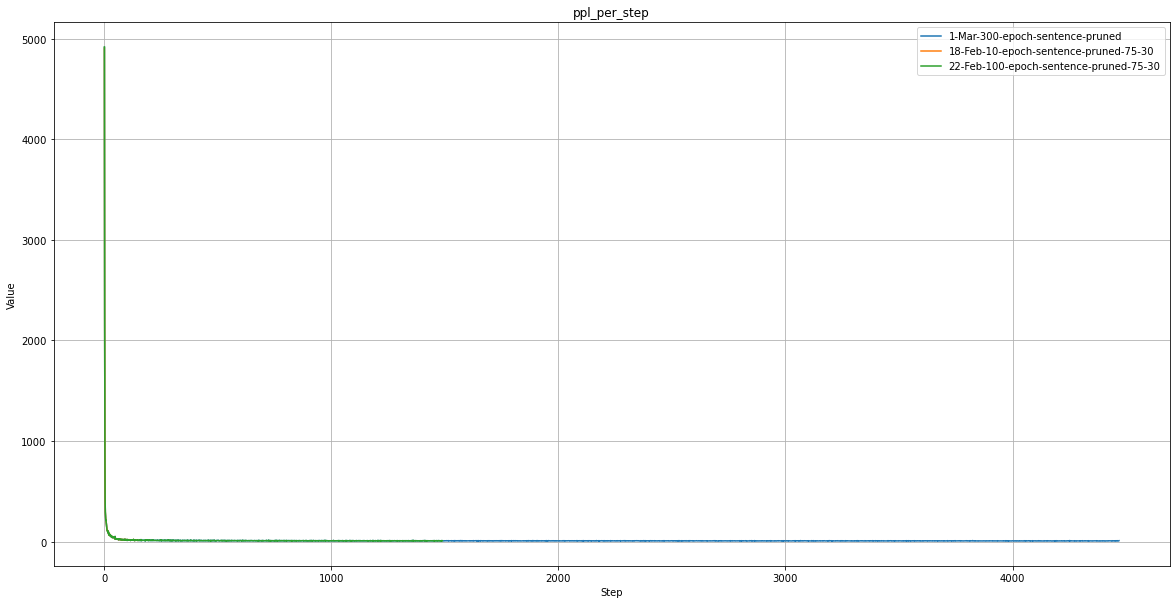

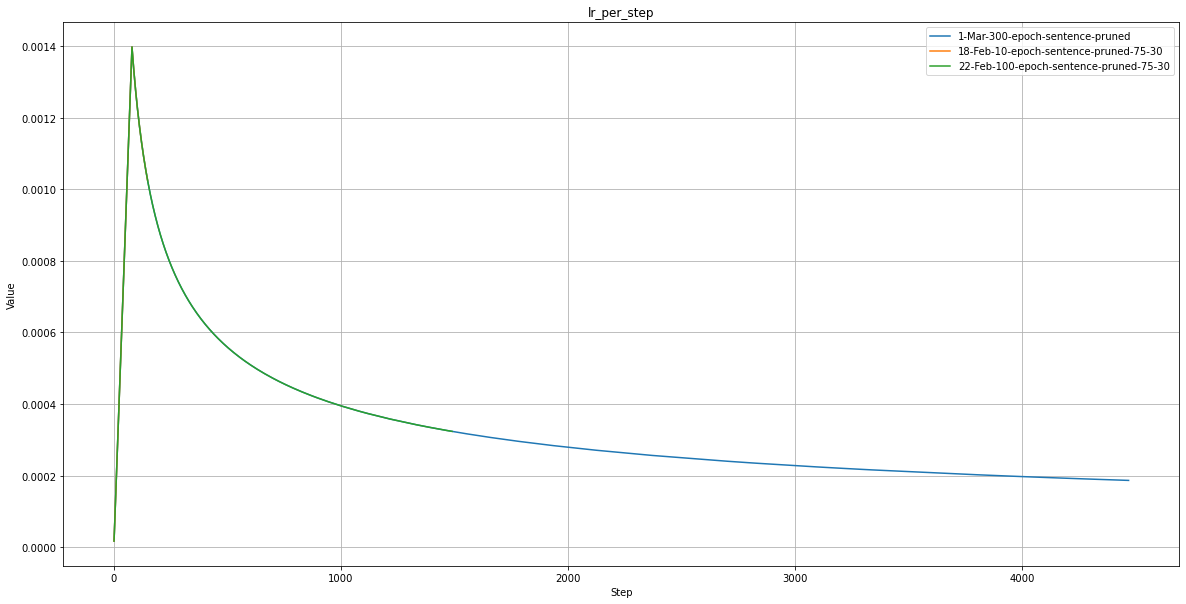

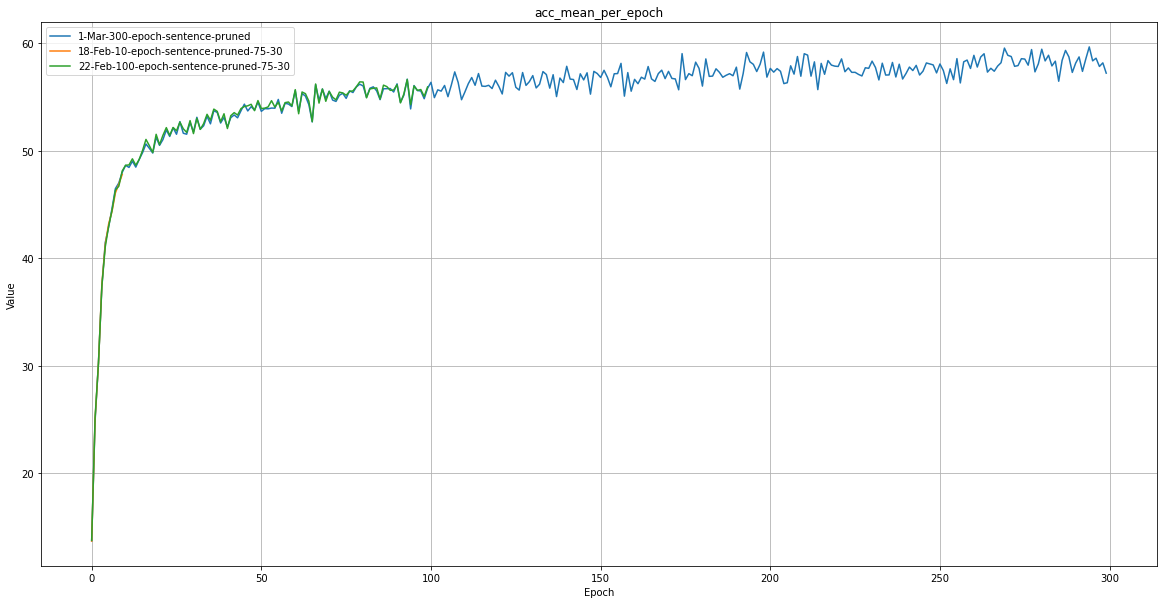

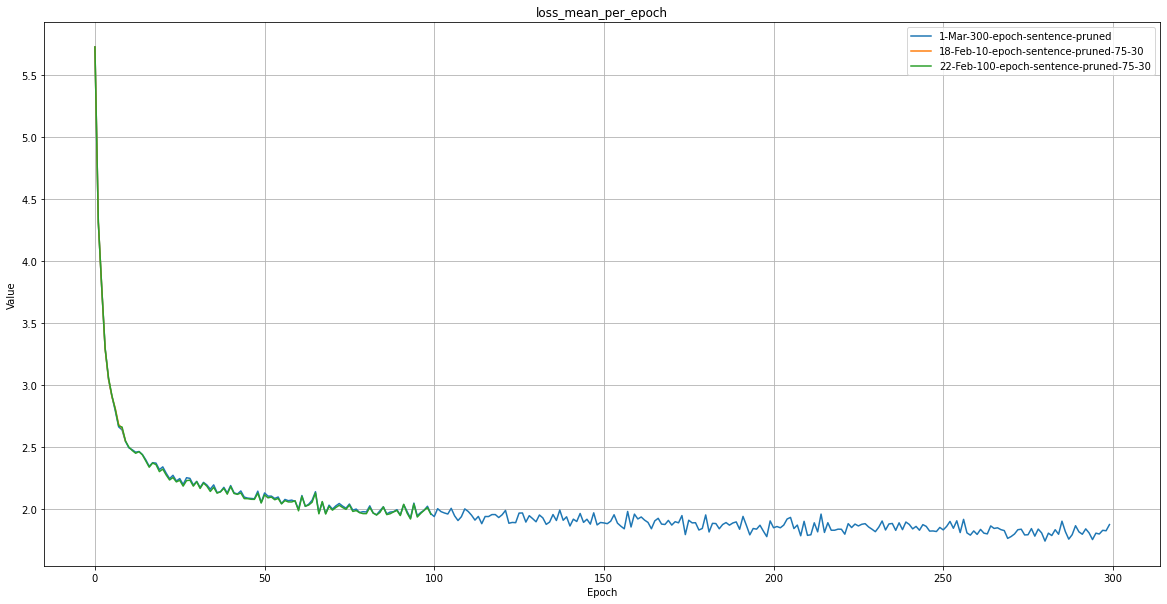

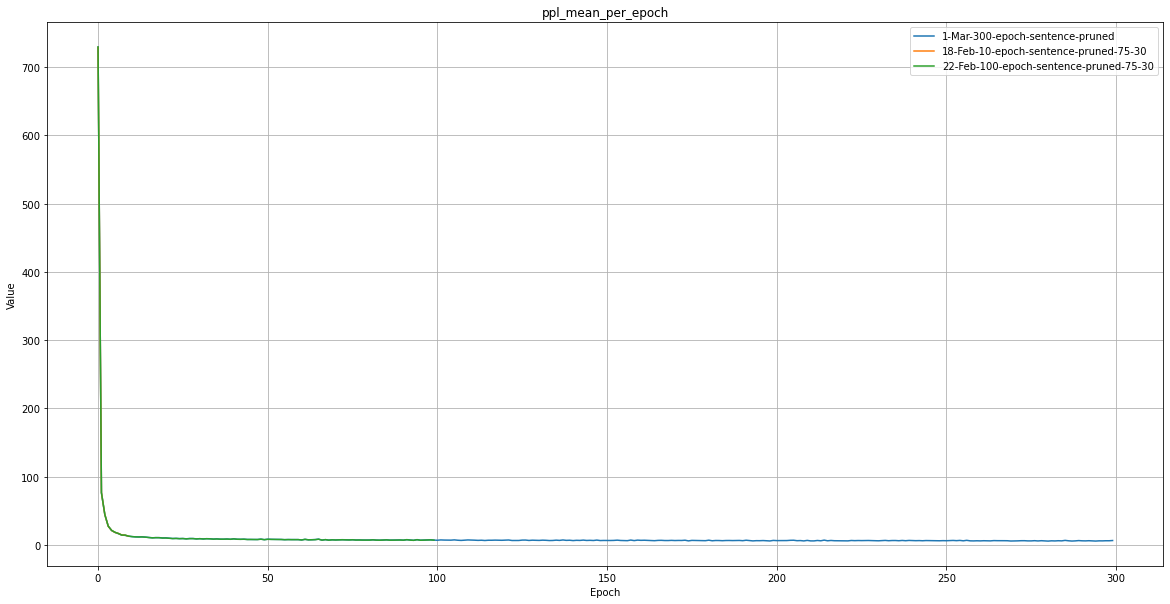

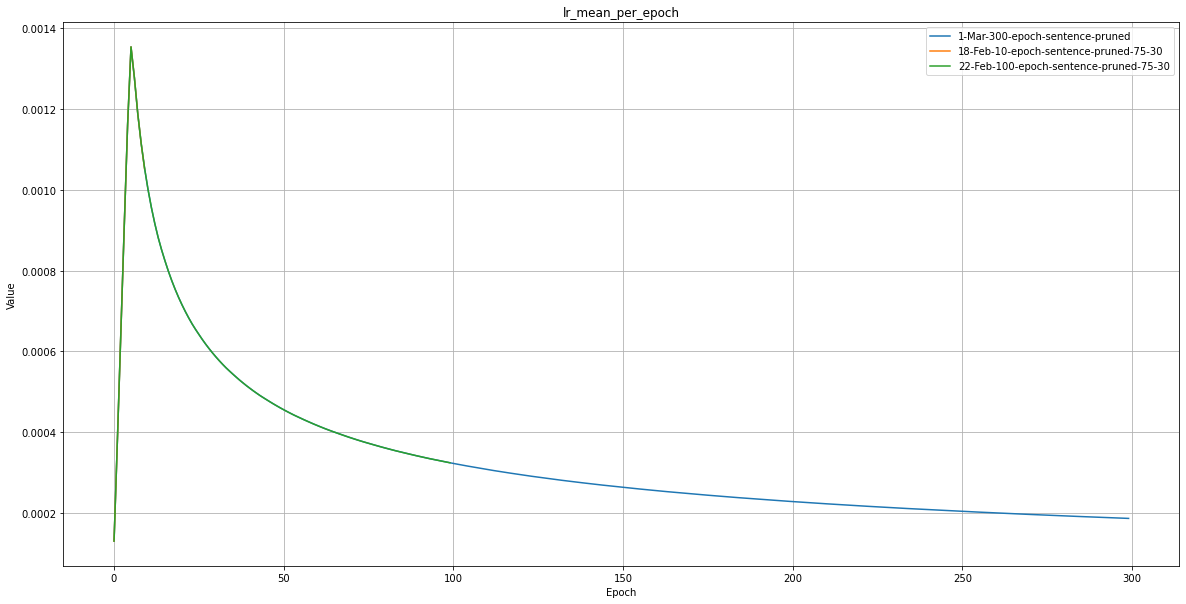

In [8]:
plot_curves(logarithmic=False)